$$ 
\Huge{ \mathbf{\text{Softmax Regression}}}
$$
$$ Binh ~ Tran $$

# Introdution

# one-vs-rest model

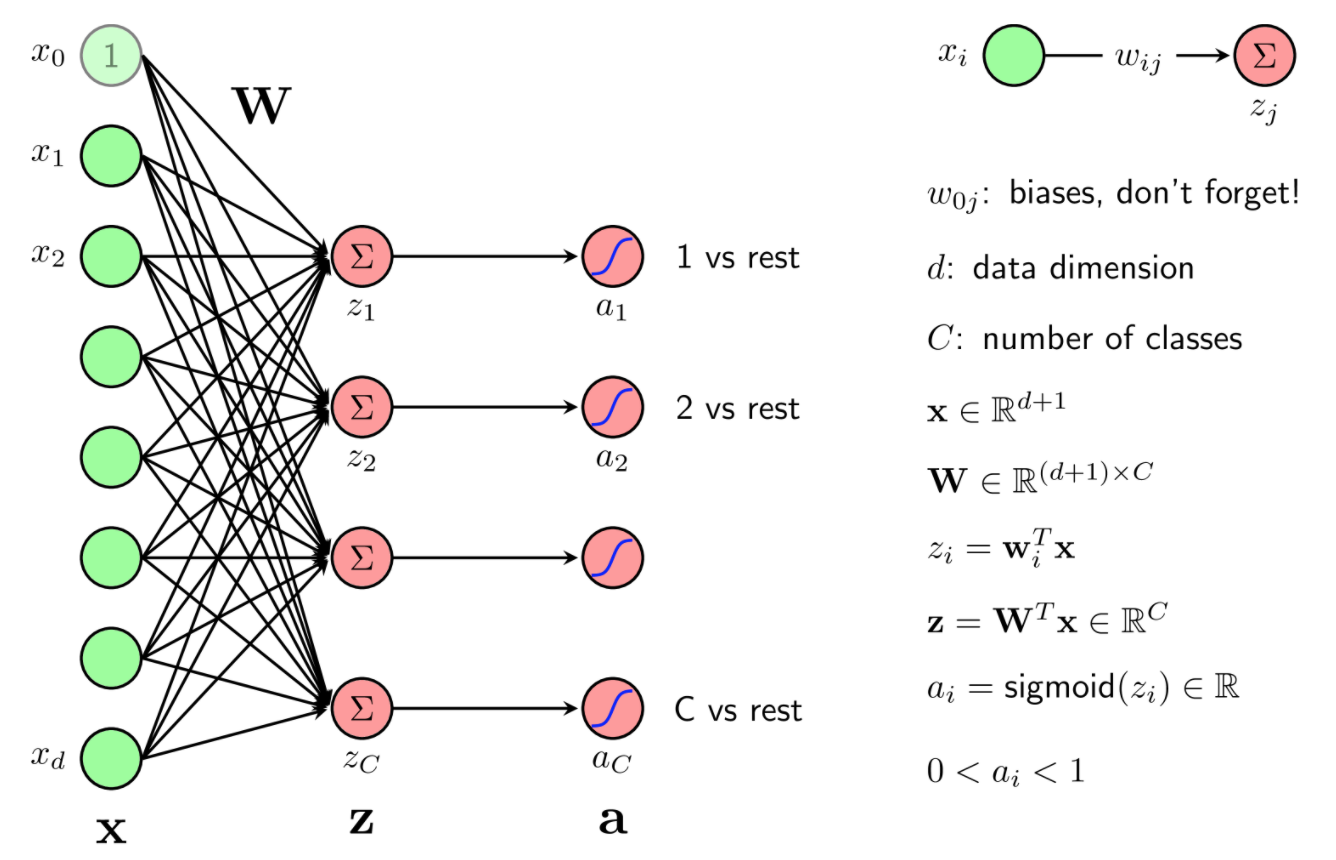

* The actual classification problems often have a lot of classes (multi-class)
* Although binary classifiers may be applicable to multi-class problems, they still have certain limitations.

* In this technique, the $a_i$ elements, $i = 1,2, ..., C$ are directly inferred only with zi. Therefore, there is no  relation between any one, ie their sum can be smaller or larger than 1. 
* If one can exploit each relation among $z_i$, the result of the classification problem can be better.

# Softmax function

## Formula of Softmax function

<div style='float: left; width:600px;'>
&nbsp;✔︎ We need a probabilistic model with every input $x$, output $a_i$ represents probability $x$ belonging to class $i$.
<br/>&nbsp; ✔︎ $\Rightarrow$ $a_i$ should be calculted on relation beetwen $z_i$
</div>

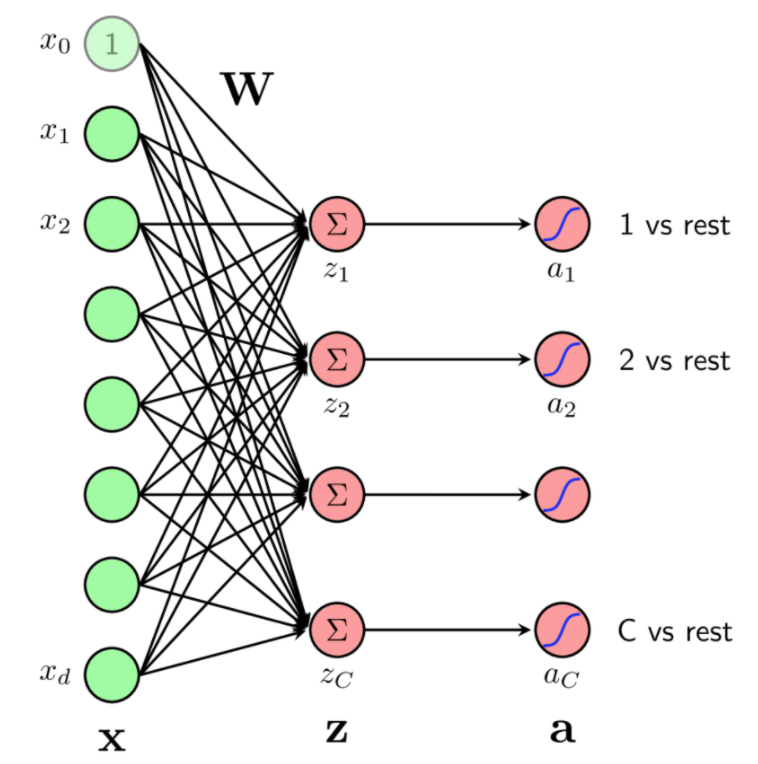

To facilitate the computation of derivatives $a_i$ is defined as below:
$$a_i = \frac{e^{(z_i)}}{\sum_{j=1}^C e^{(z_j)}}, ~~ \forall i = 1, 2, \dots, C$$ 

**Characterize of function** 

✔︎ **Rely on all the $z_i$**


✔︎ **Positive, sum of 1**

$\Large {✤}$ **NOTE**

* With this define, $a_i$ **always >0 and <1** although they can be very close to 0 or 1
* At this point, we can assume that:
$$P(y_k = i | \mathbf{x}_k; \mathbf{W}) = a_i$$

Where $P(y = i | \mathbf{x}; \mathbf{W})$ is interpreted as 

> the probability that a data point $x$ falls into the $i^{th}$ class if the model parameter (weight matrix) is $W$

**Softmax Regression network as a neural network:**

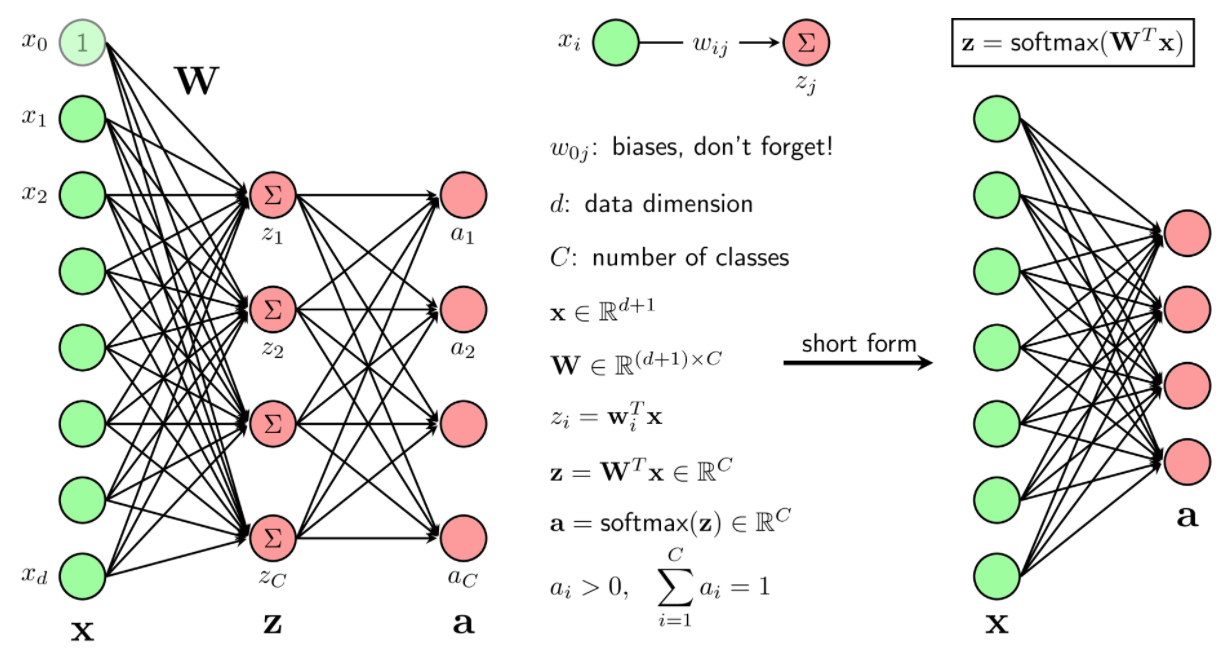

# Softmax with python

In [79]:
import numpy as np 
import matplotlib.pyplot as plt
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def softmax(Z):
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0)
    return A




# A few examples

Example of relationship between input and output of softmax function

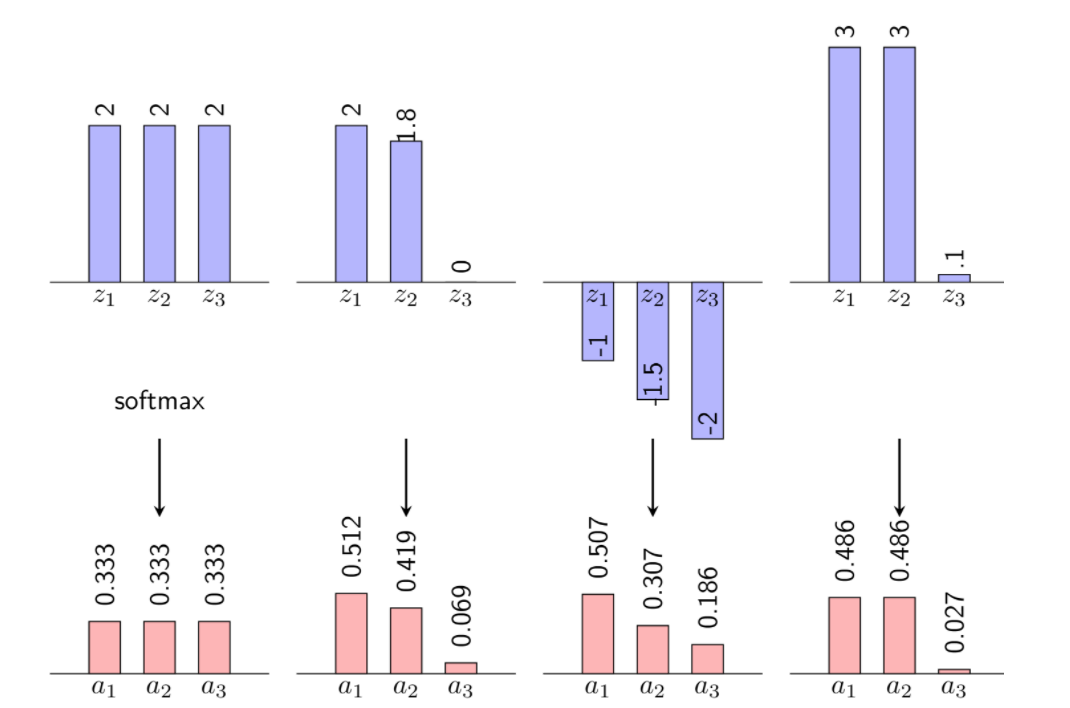

Refer to [here (go to the softmax section)](http://neuralnetworksanddeeplearning.com/chap3.html) for demo relationship between input and output of softmax function

# More stable version of softmax function

When one of the $z_i$ is too large $\rightarrow$ the computation $e^{z_i}$ can cause overflow.

**Overcome this phenomenon by**

\begin{eqnarray}
\frac{e^{z_i}}{\sum_{j=1}^C e^{z_j}} &=& \frac{e^{-c} e^{z_i}}{e^{-c}\sum_{j=1}^C e^{z_j}}\\
&=& \frac{e^{z_i-c}}{\sum_{j=1}^C e^{z_j-c}}
\end{eqnarray}

We often chose: $c = \max (z_i)$

# Loss function and optimal method

## One hot coding

We have
$\mathbf{a} = \text{softmax}(\mathbf{W}^T\mathbf{x}) \Rightarrow J(\mathbf{W}) = \sum_{i=1}^N ||\mathbf{a}_i - \mathbf{y}_i||_2^2$

## Cross Entropy

Cross entropy between two distributions $p, q$ is defined as:

$H(\mathbf{p}, \mathbf{q}) =-\sum_{i=1}^C p_i \log q_i ~~~ (1)$

To better understand the advantages of the cross entropy function and the normal distance squared, see figure below

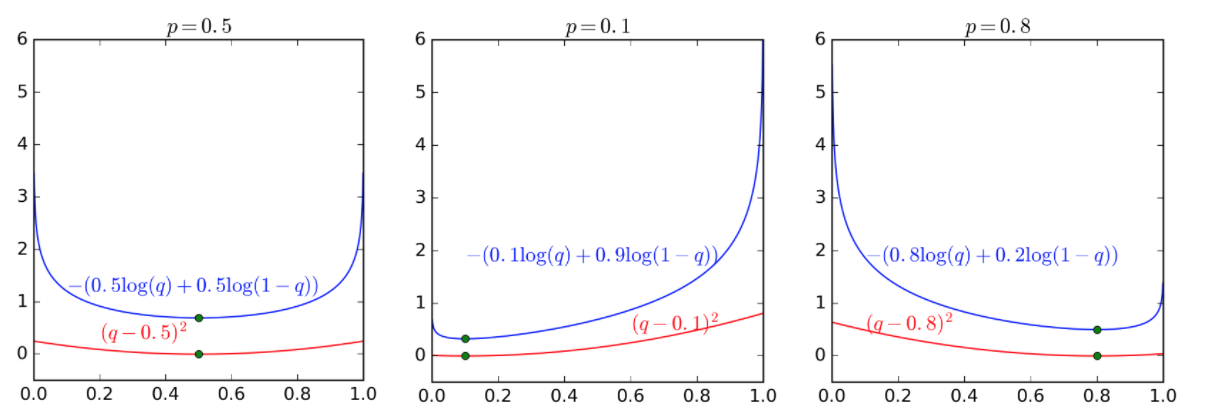

**NOTE:**

In Logistic Regression, we also have two simple distributions.

1) The real output of the input data point $x_i$ is the probability distribution is $[y_i; 1 - y_i]$
where $y_i$ is the probability that the input point falls into the first class (equals 1 if $y_i$ = 1, equals 0 if $y_i$ = 0).

2) The predicted output of that data point is $a_i = sigmoid (w^Tx)$ is the probability that the point falls into the first class. The probability that the point falls into the second class can easily be deduced from lf $1-a_i$

**Thus, the loss function in Logistic Regression:**

$$ J(\mathbf{w}) = -\sum_{i=1}^N(y_i \log {a}_i + (1-y_i) \log (1 - {a}_i)) $$

It is a special case of Cross Entropy. (N is used to represent the data points in the training set).

With **Softmax Regression**, in the case of **C classes**, the loss between the predicted output and the real output of a data point $x_i$ is calculated by:

$$J(\mathbf{W};\mathbf{x}_i, \mathbf{y}_i) = -\sum_{j=1}^C y_{ji}\log(a_{ji})$$

## Loss function for Softmax Regression

\begin{eqnarray}
J(\mathbf{W}; \mathbf{X}, \mathbf{Y}) = -\sum_{i = 1}^N \sum_{j = 1}^C y_{ji}\log(a_{ji}) \\
= -\sum_{i = 1}^N \sum_{j = 1}^C y_{ji}\log\left(\frac{e^{\mathbf{w}_j^T\mathbf{x}_i}}{\sum_{k=1}^C e^{\mathbf{w}_k^T\mathbf{x}_i}}\right)
\end{eqnarray}

With weight matrix $\mathbf{W}$ is matrix needed to optimal

## Optimization of loss function

We use Stochastic Gradient Descent (SGD)

With only one pair of data $(\mathbf{x}_i, \mathbf{y}_i)$

\begin{eqnarray}
J_i(\mathbf{W}) \triangleq J(\mathbf{W}; \mathbf{x}_i, \mathbf{y}_i) &=&\\
&=& -\sum_{j = 1}^C y_{ji}\log\left(\frac{e^{\mathbf{w}_j^T\mathbf{x}_i}}{\sum_{k=1}^C e^{\mathbf{w}_k^T\mathbf{x}_i}}\right) \\
&=& -\sum_{j=1}^C\left(y_{ji} \mathbf{w}_j^T\mathbf{x}_i - y_{ji}\log\left(\sum_{k=1}^C e^{\mathbf{w}_k^T\mathbf{x}_i}\right)\right) \\
&=& -\sum_{j=1}^C y_{ji} \mathbf{w}_j^T\mathbf{x}_i + \log\left(\sum_{k=1}^C e^{\mathbf{w}_k^T\mathbf{x}_i}\right) ~~ (3)\\
&&where~\sum_{j=1}^C y_{ji} = 1\\ 
~\\
\frac{\partial J_i(\mathbf{W})}{\partial \mathbf{W}} = \left[\frac{\partial J_i(\mathbf{W})}{\partial \mathbf{w}_1}, \frac{\partial J_i(\mathbf{W})}{\partial \mathbf{w}_2}, \dots, \frac{\partial J_i(\mathbf{W})}{\partial \mathbf{w}_C}    \right]~~(4)
\end{eqnarray}

the gradient by column can be calculated according to (3):

\begin{eqnarray}
\frac{\partial J_i(\mathbf{W})}{\partial \mathbf{w}_j} &=& -y_{ji}\mathbf{x}_i + 
\frac{e^{\mathbf{w}_j^T\mathbf{x}_i}}{\sum_{k = 1}^C e^{\mathbf{w}_k^T\mathbf{x}_i}}\mathbf{x}_i \\
&=& -y_{ji}\mathbf{x}_i + a_{ji} \mathbf{x}_i = \mathbf{x}_i (a_{ji} - y_{ji}) \\
&=& e_{ji}\mathbf{x}_{i} ~(\text{where}~ e_{ji} = a_{ji} - y_{ji}) ~~(5)
\end{eqnarray}

$$ (4),(5) \Rightarrow \frac{\partial J_i(\mathbf{W})}{\partial \mathbf{W}} = \mathbf{x}_i [e_{1i}, e_{2i}, \dots, e_{Ci}] = \mathbf{x}_i\mathbf{e}_i^T $$

\begin{eqnarray}
We ~ can \Rightarrow && \\
&& \frac{\partial J(\mathbf{W})}{\partial \mathbf{W}} = \sum_{i=1}^N \mathbf{x}_i\mathbf{e}_i^T = \mathbf{X}\mathbf{E}^T \\
&& Where ~ \mathbf{E} = \mathbf{A - Y}
\end{eqnarray}

Assuming that we use the SGD, the updated formula for the weight matrix $\mathbf{W}$ will be:

$$ \mathbf{W} = \mathbf{W} +\eta \mathbf{x}_{i}(\mathbf{y}_i - \mathbf{a}_i)^T $$

* Do you find this formula similar to the **Logistic Regression** update formula?

## Logistic Regression is a special case of Softmax Regression

When C = 2, Softmax Regression and Logistic Regression are the same.

Softmax regression with C = 2 can be written as:

\begin{eqnarray}
a_1 &=& \frac{e^{\mathbf{w}_1^T\mathbf{x}}} {e^{\mathbf{w}_1^T\mathbf{x}}+ e^{\mathbf{w}_2^T\mathbf{x}}} \\
&=& \frac{1}{1 + e^{(\mathbf{w}_2 - \mathbf{w}_1)^T\mathbf{x}}}
\end{eqnarray}

# Example with Python

## Implement algorithm

Simple data to test implementation

In [20]:
import numpy as np 

np.random.seed(1)                          # for fixing random values

# randomly generate data 
N = 2 # number of training sample 
d = 2 # data dimension 
C = 3 # number of classes 

X = np.random.randn(d, N)
y = np.random.randint(0, 3, (N,))

In [26]:
# %load ../00_Libs/DisplaySideBySide.py
import pandas as pd
from IPython.display import display, HTML

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display(HTML(html_str.replace('table','table style="display:inline"')))

In [41]:
from scipy import sparse 
import pandas as pd
import IPython.display
def convert_labels(y, C = 3):
    """
    convert 1d label to a matrix label: each column of this 
    matrix coresponding to 1 element in y. In i-th column of Y, 
    only one non-zeros element located in the y[i]-th position, 
    and = 1 ex: y = [0, 2, 1, 0], and 3 classes then return

            [[1, 0, 0, 1],
             [0, 0, 1, 0],
             [0, 1, 0, 0]]
    """
    Y = sparse.coo_matrix((np.ones_like(y), 
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y 

Y = convert_labels(y, C)


#Display data
Y_columns = ['y%i'%i for i in range(N)]
# pd.DataFrame(y, columns=['y'])


df1 = pd.DataFrame(y, columns=['y']).set_index('y')
df2 = pd.DataFrame(Y, columns = Y_columns).set_index('y0')
display(df1)
display(df2)

Empty DataFrame
Columns: []
Index: [2, 1]

y1
y0    
0    0
0    1
1    0

In [42]:

def softmax(Z):
    """
    Compute softmax values for each sets of scores in V.
    each column of V is a set of score.    
    """
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0)
    return A

def softmax_stable(Z):
    """
    Compute softmax values for each sets of scores in V.
    each column of V is a set of score.    
    """
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A

# cost or loss function  
def cost(X, Y, W):
    A = softmax(W.T.dot(X))
    return -np.sum(Y*np.log(A))

W_init = np.random.randn(d, C)

def grad(X, Y, W):
    A = softmax((W.T.dot(X)))
    E = A - Y
    return X.dot(E.T)
    
def numerical_grad(X, Y, W, cost):
    eps = 1e-6
    g = np.zeros_like(W)
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            W_p = W.copy()
            W_n = W.copy()
            W_p[i, j] += eps 
            W_n[i, j] -= eps
            g[i,j] = (cost(X, Y, W_p) - cost(X, Y, W_n))/(2*eps)
    return g 

g1 = grad(X, Y, W_init)
g2 = numerical_grad(X, Y, W_init, cost)

print(np.linalg.norm(g1 - g2))


4.2290599404677876e-10


In [43]:
def softmax_regression(X, y, W_init, eta, tol = 1e-4, max_count = 10000):
    W = [W_init]    
    C = W_init.shape[1]
    Y = convert_labels(y, C)
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    
    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax(np.dot(W[-1].T, xi))
            W_new = W[-1] + eta*xi.dot((yi - ai).T)
            count += 1
            # stopping criteria
            if count%check_w_after == 0:                
                if np.linalg.norm(W_new - W[-check_w_after]) < tol:
                    return W
            W.append(W_new)
    return W

eta = .05 
d = X.shape[0]
W_init = np.random.randn(d, C)

W = softmax_regression(X, y, W_init, eta)
print(W[-1])

[[-0.74048058 -2.89890043  3.27457709]
 [ 2.48311203 -2.66022372  0.71357084]]


In [44]:
def pred(W, X):
    """
    predict output of each columns of X
    Class of each x_i is determined by location of max probability
    Note that class are indexed by [0, 1, 2, ...., C-1]
    """
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis = 0)

## Exampe with Simulated data

** Create three data clusters **

In [45]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

# each column is a datapoint
X = np.concatenate((X0, X1, X2), axis = 0).T 
# extended data
X = np.concatenate((np.ones((1, 3*N)), X), axis = 0)
C = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

**The distribution of the data is given below:**

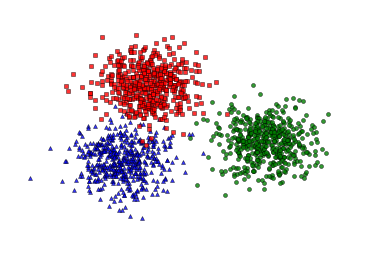

In [47]:
import matplotlib.pyplot as plt
def display(X, label):
#     K = np.amax(label) + 1
    X0 = X[:, label == 0]
    X1 = X[:, label == 1]
    X2 = X[:, label == 2]
    
    plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[0, :], X1[1, :], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[0, :], X2[1, :], 'rs', markersize = 4, alpha = .8)

#     plt.axis('equal')
    plt.axis('off')
    plt.plot()
    plt.show()
    
display(X[1:, :], original_label)

**Do Softmax Regression**

In [48]:
W_init = np.random.randn(X.shape[0], C)
W = softmax_regression(X, original_label, W_init, eta)
print(W[-1])

[[ 8.45809734 -3.88415491 -3.44660294]
 [-1.11205751  1.50441603 -0.76358758]
 [ 0.24484886  0.26085383  3.3658872 ]]


In [49]:
#Visualize 
# x_min, x_max = X[:, 1].min() - .5, X[:, 1].max() + .5
# y_min, y_max = X[:, 2].min() - .5, X[:, 2].max() + .5
# x_min, x_max = -4, 14
# y_min, y_max = -4, 14

xm = np.arange(-2, 11, 0.025)
xlen = len(xm)
ym = np.arange(-3, 10, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)


# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# xx.ravel(), yy.ravel()

print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)

# print(xx.shape, yy.shape)
XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)


print(XX.shape)

Z = pred(W[-1], XX)

(1, 270400)
(3, 270400)


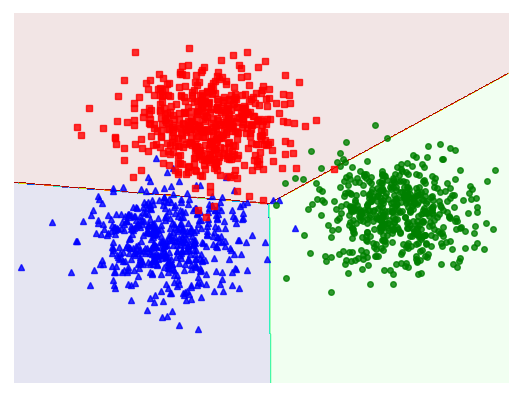

In [182]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)

# plt.pcolormesh(xx, yy, Z, cmap='jet', alpha = .35)

CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)



plt.xlim(-2, 11)
plt.ylim(-3, 10)
plt.xticks(())
plt.yticks(())
# plt.axis('equal')
display(X[1:, :], original_label)
# plt.savefig('ex1.png', bbox_inches='tight', dpi = 300)
plt.show()